In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [91]:
heart_data = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

In [92]:
heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [93]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [94]:
heart_data.shape

(918, 12)

In [95]:
heart_data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [96]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [97]:
heart_data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [98]:
heart_data.duplicated().unique()

array([False])

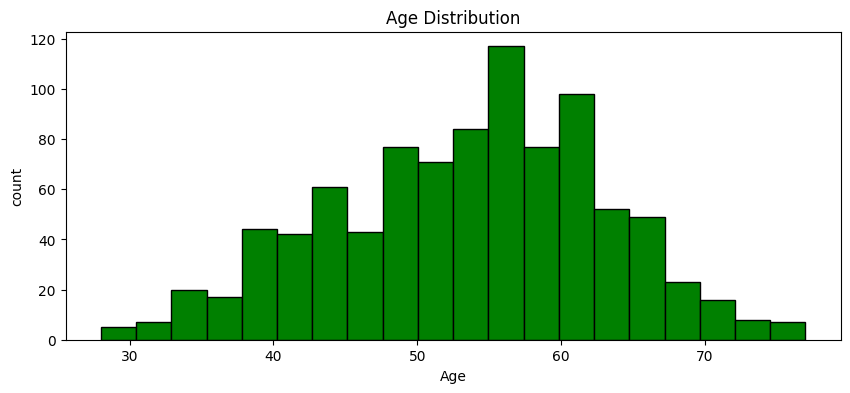

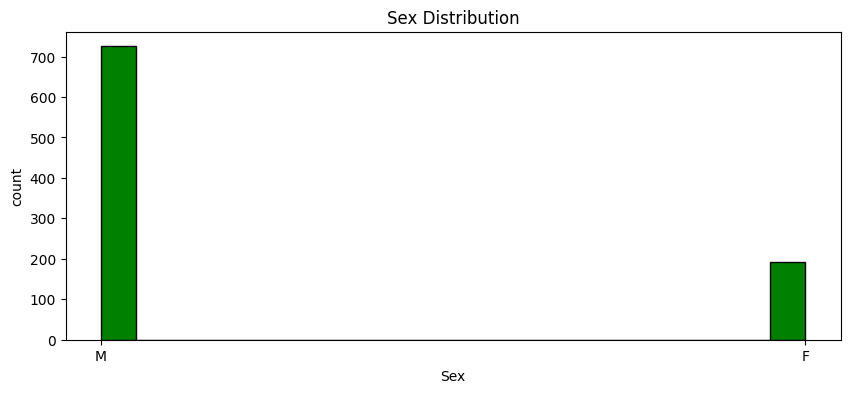

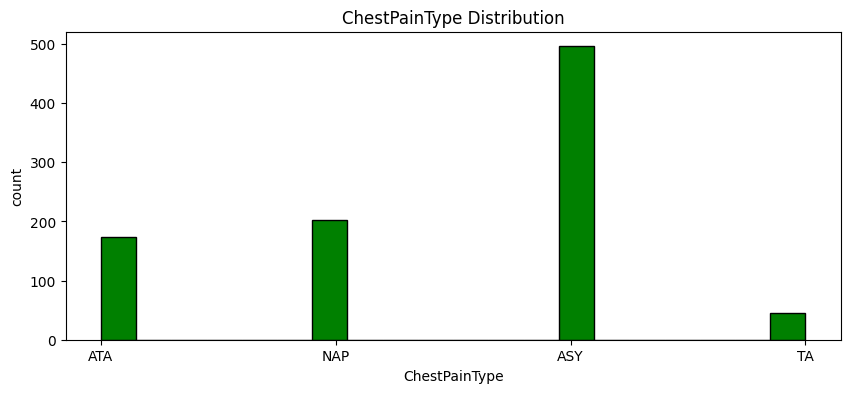

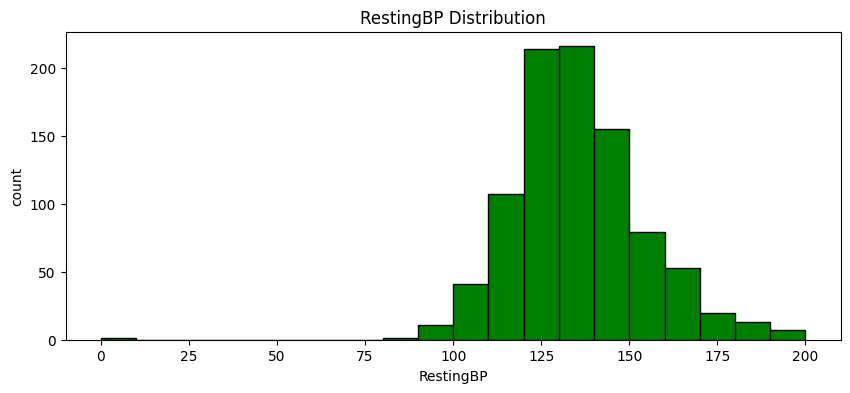

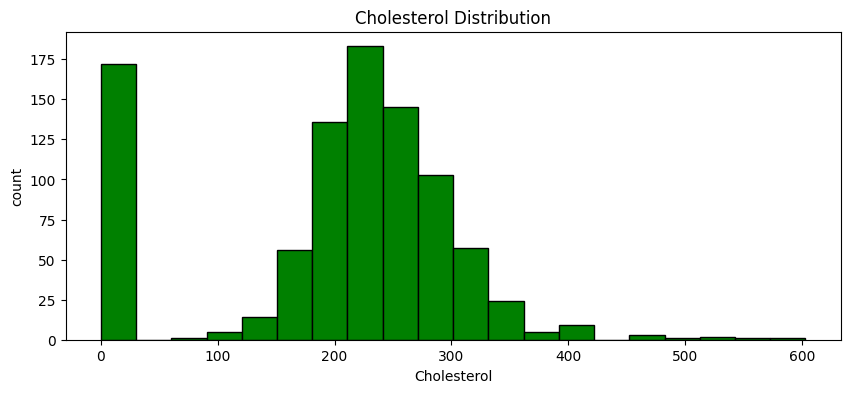

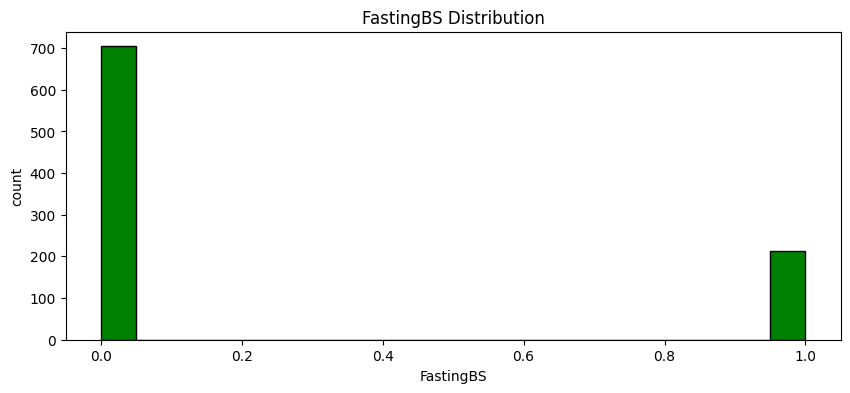

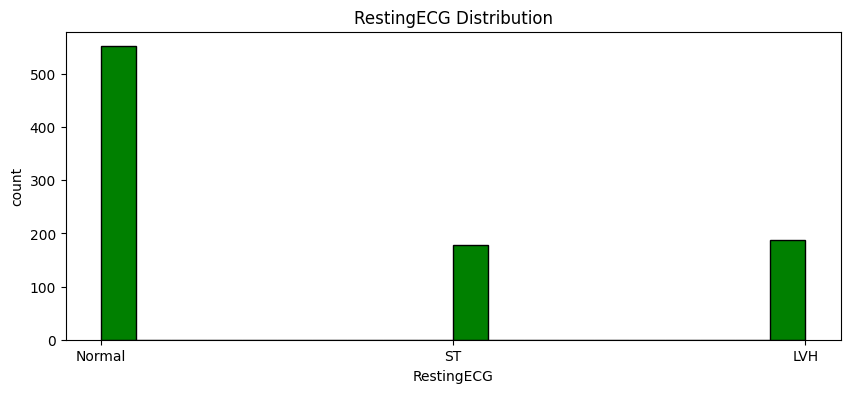

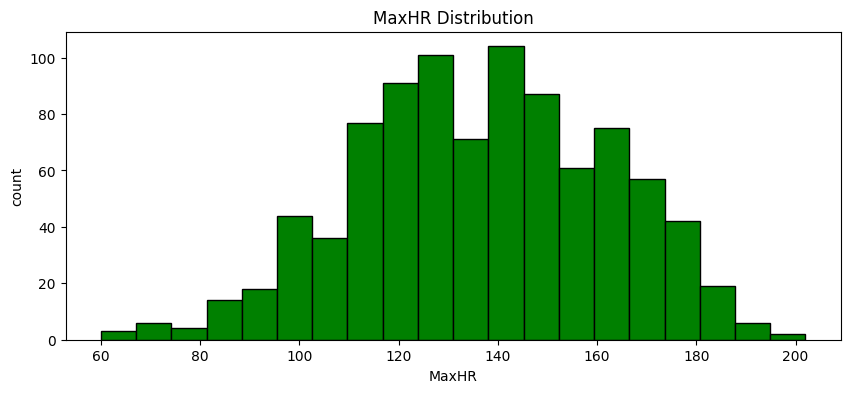

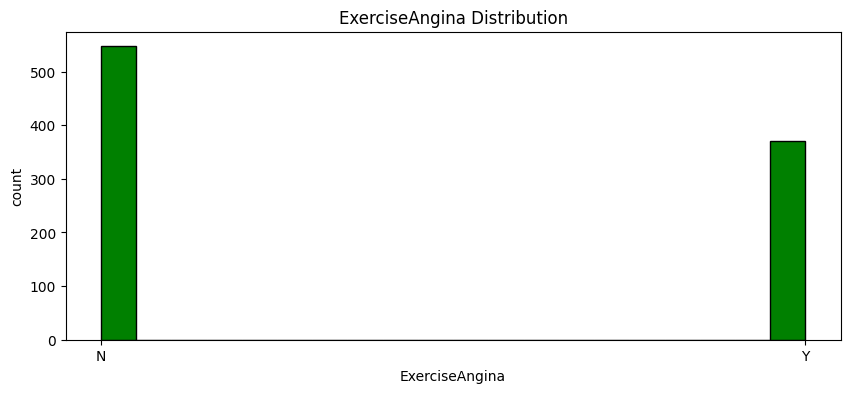

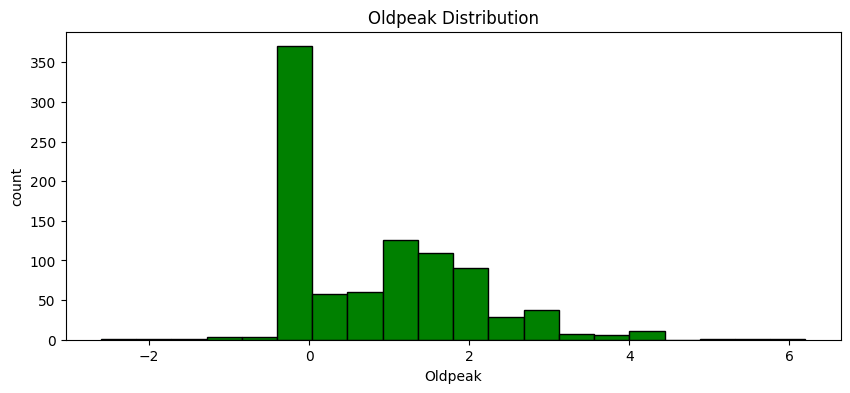

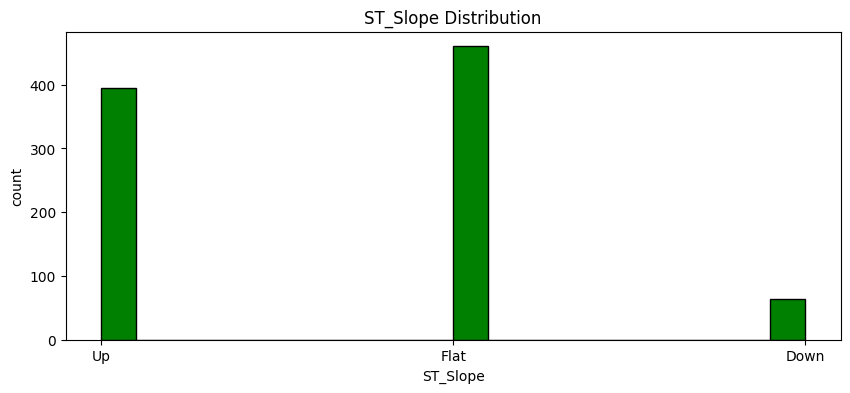

In [99]:
# create hist plot for all columns except target
for col in heart_data.columns:
    if col !="HeartDisease":
      plt.figure(figsize=(10,4))
      plt.title(f"{col} Distribution")
      plt.xlabel(col)
      plt.ylabel("count")
      plt.hist(heart_data[col],bins=20,color='green',edgecolor='black')
      plt.show()


<Axes: xlabel='HeartDisease', ylabel='count'>

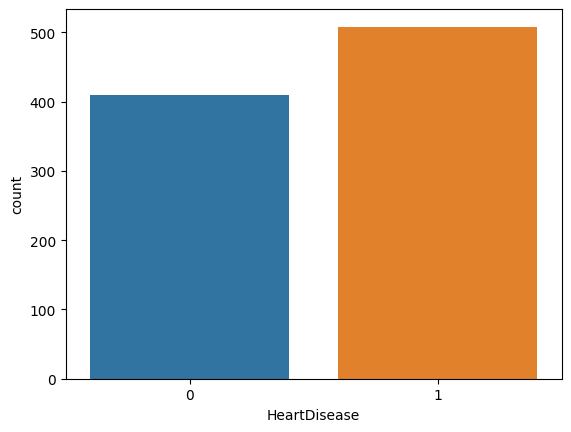

In [100]:
sns.countplot(x="HeartDisease",data=heart_data)
# in this data we find that no of person who have heart is high

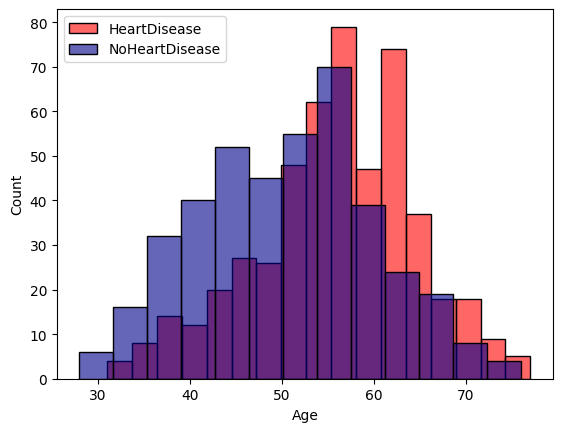

In [101]:
sns.histplot(heart_data[heart_data["HeartDisease"]==1]["Age"],color="red",label="HeartDisease",alpha=0.6)
sns.histplot(heart_data[heart_data["HeartDisease"]==0]["Age"],color="darkblue",label="NoHeartDisease",alpha=0.6)
plt.legend()

In [102]:
# we see that most of patients who have heart from 55-65 years old

In [103]:
age_summary=heart_data.groupby("HeartDisease")["Age"].describe()
print("summary statistics for age: ")
print(age_summary)

summary statistics for age: 
              count       mean       std   min   25%   50%   75%   max
HeartDisease                                                          
0             410.0  50.551220  9.444915  28.0  43.0  51.0  57.0  76.0
1             508.0  55.899606  8.727056  31.0  51.0  57.0  62.0  77.0


**average of age of person who has heart disease 55 years old average of age of person who has no heart disease 50 years old max age of person who has heart disease 77 years old min age of person who has heart disease 31 years old max age of person who has no heart disease 76 years old min age of person who has no heart disease 28 years old

In [104]:
heart_data["ChestPainType"].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

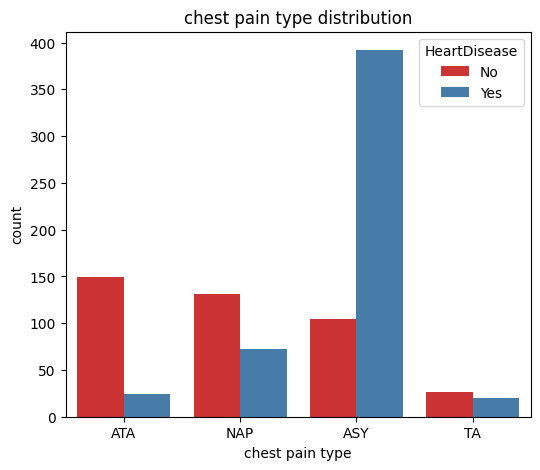

In [105]:
plt.figure(figsize=(6,5))
sns.countplot(data=heart_data,x="ChestPainType",hue="HeartDisease",palette="Set1")
plt.title("chest pain type distribution")
plt.xlabel("chest pain type")
plt.legend(title="HeartDisease",labels=["No","Yes"])

**according to this graph we will get that patients have chest pain(ASY) Probability that they have heart disease is high**

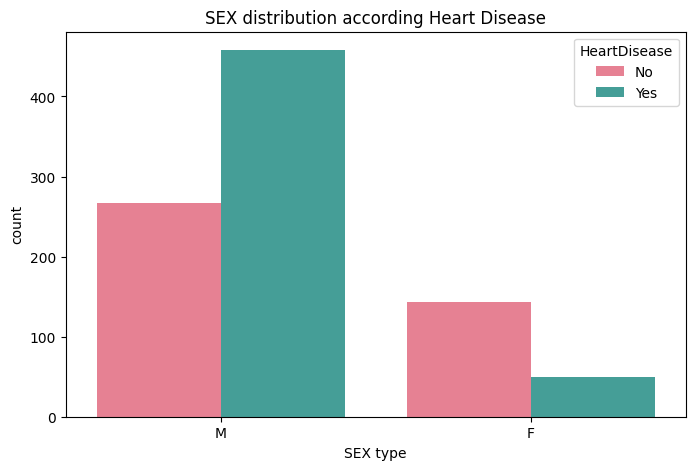

In [106]:
plt.figure(figsize=(8,5))
sns.countplot(data=heart_data,x="Sex",hue="HeartDisease",palette="husl")
plt.title("SEX distribution according Heart Disease")
plt.xlabel("SEX type")
plt.legend(title="HeartDisease",labels=["No","Yes"])

***from this graph we will discover that probability that have heart disease is higher than female***



In [107]:
# Group by Sex and 'HeartDisease' and calculate counts
gender_heart_disease_counts = heart_data.groupby(
    ['Sex', 'HeartDisease']).size().unstack()
gender_heart_disease_counts

HeartDisease,0,1
Sex,,
F,143,50
M,267,458


Text(0, 0.5, 'frequency')

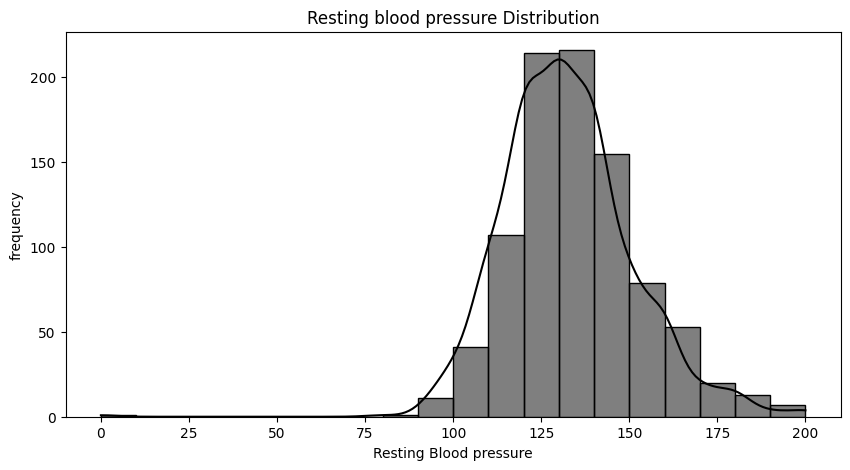

In [108]:
plt.figure(figsize=(10,5))
sns.histplot(data=heart_data,x="RestingBP",bins=20,kde=True,color="black")
plt.title("Resting blood pressure Distribution")
plt.xlabel("Resting Blood pressure")
plt.ylabel('frequency')

Text(0.5, 0, 'Cholesterol')

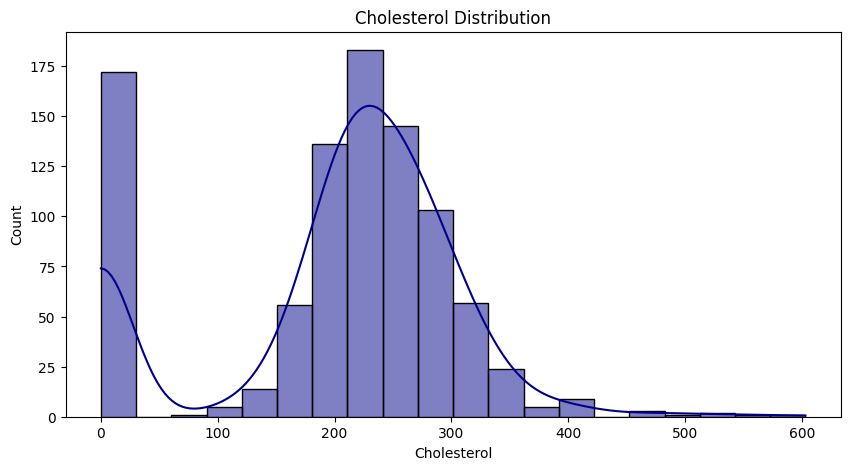

In [109]:
plt.figure(figsize=(10, 5))
sns.histplot(data=heart_data, x='Cholesterol', bins=20, kde=True, color='darkblue')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')

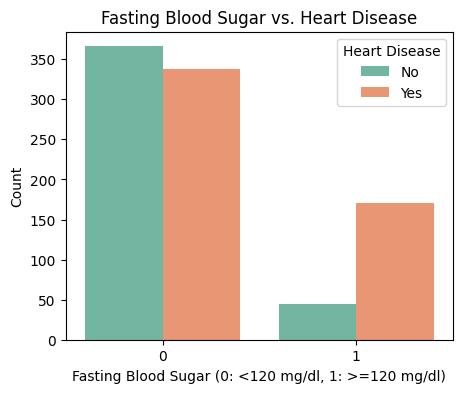

In [110]:
plt.figure(figsize=(5, 4))
sns.countplot(data=heart_data, x='FastingBS', hue='HeartDisease', palette='Set2')
plt.title('Fasting Blood Sugar vs. Heart Disease')
plt.xlabel('Fasting Blood Sugar (0: <120 mg/dl, 1: >=120 mg/dl)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

In [111]:
F_blood_sugar_heart_Diease_percentage=heart_data.groupby("FastingBS")["HeartDisease"].mean()
print("percentage of heart Disease cases by fasting blood sugar level : ")
print(F_blood_sugar_heart_Diease_percentage)

percentage of heart Disease cases by fasting blood sugar level : 
FastingBS
0    0.480114
1    0.794393
Name: HeartDisease, dtype: float64


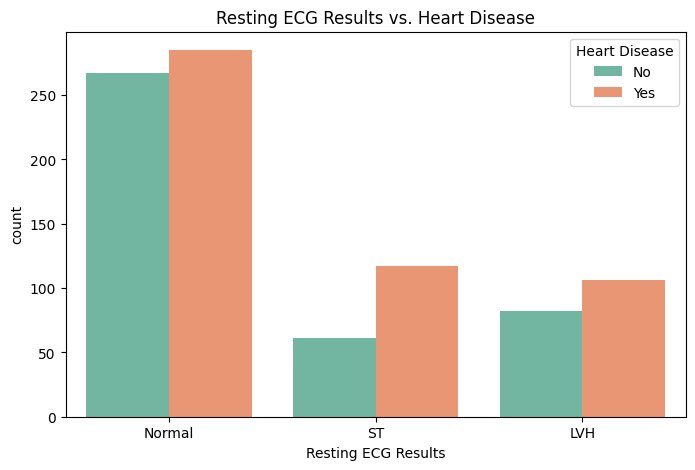

In [112]:
plt.figure(figsize=(8, 5))
sns.countplot(data=heart_data, x='RestingECG', hue='HeartDisease', palette='Set2')
plt.title('Resting ECG Results vs. Heart Disease')
plt.xlabel('Resting ECG Results')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

In [113]:
resting_ecg_heart_disease_percentage = heart_data.groupby('RestingECG')['HeartDisease'].mean()
print("Percentage of Heart Disease Cases by Resting ECG Result:")
print(resting_ecg_heart_disease_percentage)

Percentage of Heart Disease Cases by Resting ECG Result:
RestingECG
LVH       0.563830
Normal    0.516304
ST        0.657303
Name: HeartDisease, dtype: float64


Text(0, 0.5, 'Maximum Heart Rate Achieved')

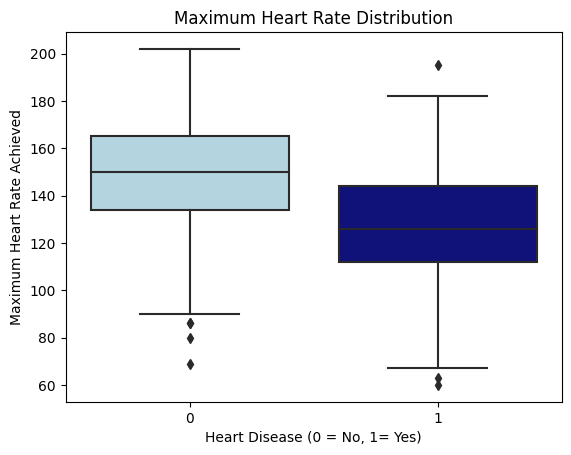

In [114]:
sns.boxplot(data=heart_data,x='HeartDisease',y="MaxHR",palette=["lightblue","darkblue"])
plt.title('Maximum Heart Rate Distribution')
plt.xlabel('Heart Disease (0 = No, 1= Yes)')
plt.ylabel('Maximum Heart Rate Achieved')

***this graph indicate that range of MAX HR without heart disease (130-170) range of MAX HR with heart disease (115-145)**

In [115]:
max_hr_mean_heart_disease = heart_data.groupby('HeartDisease')['MaxHR'].mean()
print("Mean of Maximum Heart Rate by Heart Disease Status:")
print(max_hr_mean_heart_disease)

Mean of Maximum Heart Rate by Heart Disease Status:
HeartDisease
0    148.151220
1    127.655512
Name: MaxHR, dtype: float64


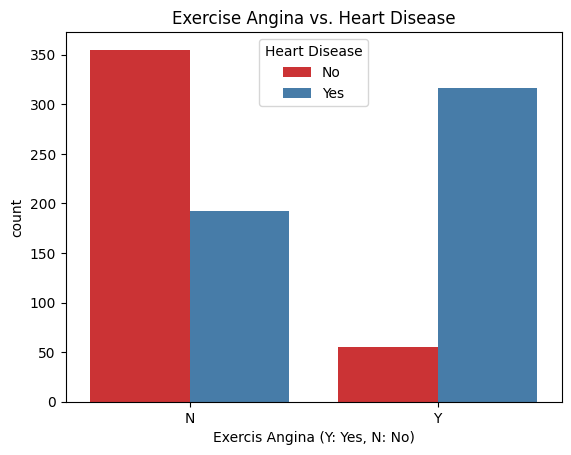

In [116]:
sns.countplot(data=heart_data, x='ExerciseAngina', hue='HeartDisease', palette='Set1')
plt.title('Exercise Angina vs. Heart Disease')
plt.xlabel('Exercis Angina (Y: Yes, N: No)')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

Text(0.5, 1.0, 'ST Slope vs. Heart Disease')

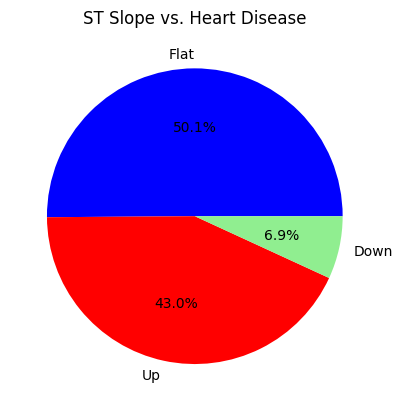

In [117]:
slope_counts=heart_data["ST_Slope"].value_counts()
plt.pie(slope_counts,labels=slope_counts.index,autopct="%1.1f%%",colors=["blue","red","lightgreen"])
plt.title('ST Slope vs. Heart Disease')

In [118]:
# check outliers in data
Q1=heart_data["Age"].quantile(0.25)
Q3=heart_data["Age"].quantile(0.75)
IQR=Q3-Q1
# indentify outliers in Age column
data_with_outliers=heart_data[heart_data["Age"]<Q1-1.5*IQR/(heart_data["Age"]>Q3+1.5*IQR)]
print(heart_data.shape)
print(data_with_outliers.shape)
# in this column there are no outliers


(918, 12)
(0, 12)


In [119]:
df=heart_data

In [120]:
# processing categorical columns
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
target_columns=["Sex",'ChestPainType',"RestingECG","ExerciseAngina","ST_Slope"]


In [121]:
for column in target_columns:
     df[column] = encoder.fit_transform(df[column])

In [122]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [123]:
df.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
scaler = StandardScaler()

In [126]:
df[["Age" , "RestingBP","Cholesterol","MaxHR" ]] = scaler.fit_transform(df[["Age" , "RestingBP","Cholesterol","MaxHR"]])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,0,1,1.382928,0,0.0,2,0
1,-0.478484,0,2,1.491752,-0.171961,0,1,0.754157,0,1.0,1,1
2,-1.751359,1,1,-0.129513,0.770188,0,2,-1.525138,0,0.0,2,0
3,-0.584556,0,0,0.302825,0.139040,0,1,-1.132156,1,1.5,1,1
4,0.051881,1,2,0.951331,-0.034755,0,1,-0.581981,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,3,-1.210356,0.596393,0,1,-0.188999,0,1.2,1,1
914,1.536902,1,0,0.627078,-0.053049,1,1,0.164684,0,3.4,1,1
915,0.370100,1,0,-0.129513,-0.620168,0,1,-0.857069,1,1.2,1,1
916,0.370100,0,1,-0.129513,0.340275,0,0,1.461525,0,0.0,1,1


In [127]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix

In [128]:
x=df.drop("HeartDisease",axis=1)
y=df["HeartDisease"]

In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=5)

In [130]:
RF=RandomForestClassifier()

In [131]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [132]:
x_train_prediction=RF.predict(x_train)

In [133]:
trainig_data_accuracy=accuracy_score(x_train_prediction,y_train)
print("Accuracy on training data: " ,trainig_data_accuracy )

Accuracy on training data:  1.0


In [134]:
prediction=RF.predict(x_test)

In [135]:
test_data_accuracy=accuracy_score(prediction,y_test)
print("Accuracy on test data: " ,test_data_accuracy )

Accuracy on test data:  0.8641304347826086


In [136]:
cm = confusion_matrix(y_test, prediction)

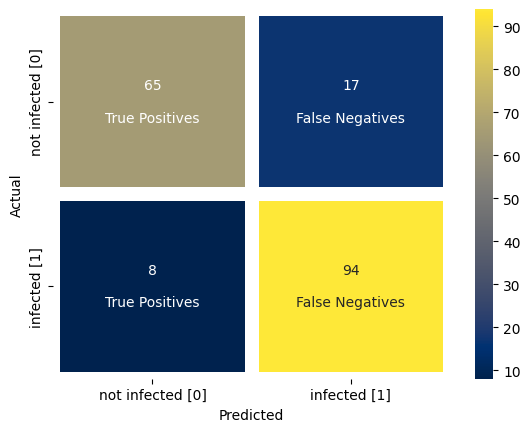

In [137]:
label = ['True Positives', 'False Negatives', 'False Positives', 'True Negatives']
annot = np.array([[f'{i}\n\n{j}' for i, j in zip(row, label)] for row in cm])
status = ["not infected [0]" , "infected [1]"]


ax = sns.heatmap(cm, annot=annot, fmt='', linecolor='white', linewidths=10 ,cmap="cividis" ,
                 xticklabels=status, yticklabels=status )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
params={"n_estimators":[10,20,50,100,150],"max_depth":[1,2,3,4,5]}

In [140]:
GS=GridSearchCV(RF,params)

In [141]:
GS.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 50, 100, 150]})

In [142]:
pd.DataFrame(GS.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020486,0.001246,0.003426,0.000132,1,10,"{'max_depth': 1, 'n_estimators': 10}",0.816327,0.795918,0.775510,0.884354,0.835616,0.821545,0.037272,25
1,0.042102,0.002549,0.004679,0.000622,1,20,"{'max_depth': 1, 'n_estimators': 20}",0.857143,0.829932,0.782313,0.904762,0.835616,0.841953,0.039793,23
2,0.092199,0.003109,0.006685,0.000701,1,50,"{'max_depth': 1, 'n_estimators': 50}",0.870748,0.843537,0.761905,0.884354,0.821918,0.836492,0.043103,24
3,0.175370,0.002953,0.009600,0.000971,1,100,"{'max_depth': 1, 'n_estimators': 100}",0.870748,0.843537,0.768707,0.891156,0.842466,0.843323,0.041493,22
4,0.254720,0.004434,0.012191,0.000665,1,150,"{'max_depth': 1, 'n_estimators': 150}",0.870748,0.843537,0.789116,0.884354,0.835616,0.844674,0.032938,21
5,0.022365,0.000966,0.003812,0.000572,2,10,"{'max_depth': 2, 'n_estimators': 10}",0.843537,0.857143,0.816327,0.911565,0.815068,0.848728,0.035296,20
6,0.038960,0.002139,0.004451,0.000397,2,20,"{'max_depth': 2, 'n_estimators': 20}",0.863946,0.877551,0.789116,0.891156,0.856164,0.855587,0.035316,16
7,0.092112,0.004245,0.006001,0.000228,2,50,"{'max_depth': 2, 'n_estimators': 50}",0.857143,0.884354,0.789116,0.904762,0.856164,0.858308,0.039064,12
8,0.171491,0.006495,0.009342,0.000510,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.857143,0.870748,0.775510,0.911565,0.849315,0.852856,0.044227,18
9,0.248171,0.004007,0.012043,0.000351,2,150,"{'max_depth': 2, 'n_estimators': 150}",0.857143,0.877551,0.795918,0.897959,0.856164,0.856947,0.034152,14


In [143]:
GS.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=50)

In [144]:
RF1=GS.best_estimator_

In [145]:
RF1.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=50)

In [146]:
x_train_prediction=RF1.predict(x_train)

In [147]:
trainig_data_accuracy=accuracy_score(x_train_prediction,y_train)
print("Accuracy on training data: " ,trainig_data_accuracy )

Accuracy on training data:  0.8787465940054496


In [148]:
prediction=RF1.predict(x_test)

In [149]:
test_data_accuracy=accuracy_score(prediction,y_test)
print("Accuracy on test data: " ,test_data_accuracy )

Accuracy on test data:  0.8804347826086957


In [150]:
cm = confusion_matrix(y_test, prediction)

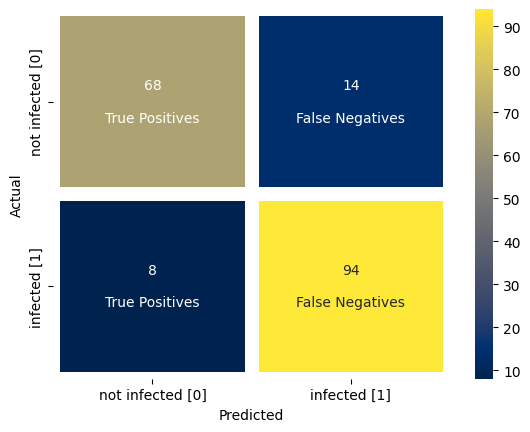

In [151]:
label = ['True Positives', 'False Negatives', 'False Positives', 'True Negatives']
annot = np.array([[f'{i}\n\n{j}' for i, j in zip(row, label)] for row in cm])
status = ["not infected [0]" , "infected [1]"]


ax = sns.heatmap(cm, annot=annot, fmt='', linecolor='white', linewidths=10 ,cmap="cividis" ,
                 xticklabels=status, yticklabels=status )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

***prediction using neural network*** *

In [152]:
import tensorflow as tf

In [153]:
from tensorflow import keras

In [154]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(x_train.shape[1],)),
    keras.layers.Dense(256 , activation = "relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128 , activation = "relu"),
    keras.layers.Dropout(0.25),
    
    
    keras.layers.Dense(1 , activation = "sigmoid"),
])

In [155]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

In [156]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 11)                0         
                                                                 
 dense_3 (Dense)             (None, 256)               3072      
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 36,097
Trainable params: 36,097
Non-trai

In [167]:
model.fit(x_train,y_train,epochs=200)

Epoch 1/200
23/23 [==============================] - 0s 4ms/step - loss: 0.0754 - accuracy: 0.9809
Epoch 2/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0758 - accuracy: 0.9728
Epoch 3/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0875 - accuracy: 0.9673
Epoch 4/200
23/23 [==============================] - 0s 4ms/step - loss: 0.0676 - accuracy: 0.9796
Epoch 5/200
23/23 [==============================] - 0s 4ms/step - loss: 0.0781 - accuracy: 0.9755
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: 0.0759 - accuracy: 0.9768
Epoch 7/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0805 - accuracy: 0.9687
Epoch 8/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0779 - accuracy: 0.9768
Epoch 9/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0799 - accuracy: 0.9687
Epoch 10/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0992 - accuracy: 0.9646
Epoch 11/

In [168]:
Y_pred = model.predict(x_test)

6/6 [==============================] - 0s 2ms/step


In [176]:
model.evaluate(x_test  ,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 2.5875 - accuracy: 0.8152


[2.5875279903411865, 0.8152173757553101]

In [169]:
Y_pred[:5]

array([[9.7385883e-01],
       [5.7066944e-03],
       [1.0000000e+00],
       [4.8544411e-02],
       [6.6803395e-06]], dtype=float32)

In [170]:
# first covert yp to [0,1] to compare with y_test
Y1_pred=[]
for element in Y_pred:
    if element>0.5:
        Y1_pred.append(1)
    else:
        Y1_pred.append(0)
        

In [171]:
Y1_pred[:10]

[1, 0, 1, 0, 0, 0, 1, 0, 0, 1]

In [172]:
ann_cm = confusion_matrix(y_test, Y1_pred)
ann_acc = round(accuracy_score(Y1_pred,y_test) * 100, 2)
print(ann_cm)
print(ann_acc,'%')

[[60 22]
 [12 90]]
81.52 %


In [173]:
# display confusion _matrix
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,Y1_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        82
           1       0.80      0.88      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



In [174]:
cm = confusion_matrix(y_test, Y1_pred)

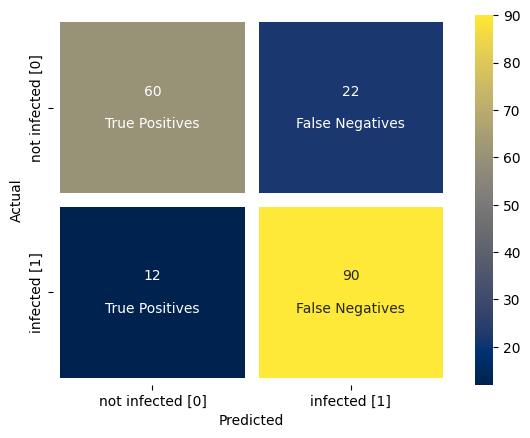

In [175]:
label = ['True Positives', 'False Negatives', 'False Positives', 'True Negatives']
annot = np.array([[f'{i}\n\n{j}' for i, j in zip(row, label)] for row in cm])
status = ["not infected [0]" , "infected [1]"]


ax = sns.heatmap(cm, annot=annot, fmt='', linecolor='white', linewidths=10 ,cmap="cividis" ,
                 xticklabels=status, yticklabels=status )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
